<a href="https://colab.research.google.com/github/data-devourer/econ_andan_23_24/blob/main/Kharisov_econometrics2_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Харисов Ильнур Шаукатович

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pyreadstat
!pip install linearmodels

import pyreadstat
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

# Значимость - на уровне 5%

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 35.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.9 MB/s eta 0:00:00


## Задача №1

In [ ]:
df, meta = pyreadstat.read_dta("/kaggle/input/dataset-ec2/bwght.dta", apply_value_formats=False)
df.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.314186


###  a)
Проблема в том что регрессия включает в себя возможно эндогенную переменную `cigs`. Ее по логике можно считать эндогенной поскольку курение во время беременности может само по себе определяться кучей других факторов и не порождаться случайно (как например пол ребенка). Оценка МНК будет смещенной и несостоянельной если в модели присутствует эндогенная переменная

### б)
Переменная средняя цена сигарет в стране проживания может быть рассмотрена в качестве инструментальной переменной для cigs, чтобы избавиться от эндогенности в модели. Однако для этого необходимо отсутствие корреляции этой переменной со случайной ошибкой - это нужно проверить. Сильную коррелированность средней цены сигарет с переменной cigs тоже лучше проверить.

### с)

In [ ]:
df['const'] = 1

model_ols = sm.OLS(df['lbwght'], df[['const', 'male', 'parity', 'lfaminc', 'cigs']]).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 lbwght   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     12.55
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.90e-10
Time:                        14:46:08   Log-Likelihood:                 356.03
No. Observations:                1388   AIC:                            -702.1
Df Residuals:                    1383   BIC:                            -675.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6756      0.022    213.681      0.0

У модели слабая предсказательная способность (R^2 на уровне 0.035). Однако хотя и доля объясненной дисперсии низка, модель в целом значима поскольку все переменные значимы на уровне 1%.

### d)

In [ ]:
model_2lsl_step_1 = sm.OLS(df['cigs'], df[['const', 'male', 'parity', 'lfaminc', 'cigprice']]).fit()
print(model_2lsl_step_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   cigs   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     10.86
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           1.14e-08
Time:                        14:46:11   Log-Likelihood:                -4428.2
No. Observations:                1388   AIC:                             8866.
Df Residuals:                    1383   BIC:                             8892.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7482      2.080      1.321      0.1

In [ ]:
df['sigs_est'] = model_2lsl_step_1.fittedvalues
model_iv = sm.OLS(df['lbwght'], df[['const', 'male', 'parity', 'lfaminc', 'sigs_est']]).fit()
print(model_iv.summary())

                            OLS Regression Results                            
Dep. Variable:                 lbwght   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.857
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           1.83e-05
Time:                        15:40:19   Log-Likelihood:                 344.91
No. Observations:                1388   AIC:                            -679.8
Df Residuals:                    1383   BIC:                            -653.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4679      0.153     29.231      0.0

- OLS оценка указывает на негативное и значимое влияние курения
- 2SLS показывает слабый и незначимый эффект

Это может сигнализировать об эндогенности `cigs` в OLS, из-за чего оценка может быть смещённой

Однако R^2 в 2SLS ниже → модель хуже объясняет дисперсию. Это указывает на слабость инструмента `cigprice` или его плохую экзогенность.

## e)
Хорошая инструментальная переменная должна:
1. Коррелировать с cigs (релевантность) - F-статистика первого шага
2. Быть экзогенной, т.е. не коррелировать с ошибочным членом (валидность) - тест Хаусмана, тест Саргана

In [ ]:
# Оценка первой стадии (проверка силы инструмента)

f_stat = model_2lsl_step_1.fvalue
print(f"F-статистика первой стадии: {f_stat:.3f}")

# Инструмент cigprice достаточно сильный тк F > 10

F-статистика первой стадии: 10.860


### Тест Хаусмана
Описание:
Проверяется гипотеза  

- $ H_0: \lim_{n \to \infty} \frac{X' \varepsilon}{n} = 0 $

- $ H_1: \lim_{n \to \infty} \frac{X' \varepsilon}{n} \neq 0 $

In [ ]:
ols_resid = model_ols.resid
test = sm.OLS(ols_resid, sm.add_constant(df[['cigs']])).fit()
hausman_pvalue = test.pvalues.iloc[1]

print(f"Тест Хаусмана: p-value = {hausman_pvalue:.3f}")

# Нет доказательств эндогенности cigs (p > 0.05), значит и обычная МНК-оценка может быть применима

Тест Хаусмана: p-value = 1.000


### J-тест Саргана
Описание:
- Нулевая гипотеза теста состоит в том, что все
инструменты экзогенные.
- Альтернативная гипотеза — в том, что хотя бы один из
инструментов эндогенен

Тест Саргана в нашем случае не применим поскольку у нас есть только 1 инструментальная переменная и один регрессор. Для применимости теста необходимо иметь инструментальных переменный строго больше чем эндогенных регрессоров!

## f)
Так как нет доказательств эндогенности `cigs`, для оценки влияния курения матери на вес новорожденных можно использовать обычный МНК, а не двухшаговый.

## Задача №2
### a)


1. ATE (средний эффект воздействия):  
  $ ATE = E[Y_i(1) - Y_i(0)] = E[Y_i(1)] - E[Y_i(0)] = E[\alpha + z_i + \varepsilon_{i1}] - E[\alpha + \varepsilon_{i0}] = \alpha + E[z_i] + E[\varepsilon_{i1}] - \alpha - E[\varepsilon_{i0}] = (\alpha + E[z_i]) - \alpha = E[z_i] = z * P[Z_i = 1]$
2. **ATET (средний эффект для тех, кто подвергся воздействию):**  
  $ ATET = E[Y_i(1)| D_i = 1] - E[Y_i(0)| D_i = 1] = \alpha + E[z_i| D_i = 1] + E[\varepsilon_{i1}] - \alpha - E[\varepsilon_{i0}] = (\alpha + E[z_i| D_i = 1]) - \alpha = E[z_i| D_i = 1] = z * P[Z_i = 1| D_i = 1]]$
3. **ATEU (средний эффект для тех, кто не подвергся воздействию):**  
  $ ATEU = E[Y_i(1)| D_i = 0] - E[Y_i(0)| D_i = 0] = \alpha + E[z_i| D_i = 0] + E[\varepsilon_{i1}] - \alpha - E[\varepsilon_{i0}] = (\alpha + E[z_i| D_i = 0]) - \alpha = E[z_i| D_i = 0] = z * P[Z_i = 1| D_i = 0] $


### b)
Три эффекта совпадают когда распределение $ Z_i $ не зависит от $ D_i $, т.е если вероятность прохождения линейной алгебры одинакова для всех

### c)
Если $ E[\varepsilon_{i0} | D_i] = 0 $ то выходит что $ selection\_bias = E[Y_i(0) | D_i = 1] - E[Y_i(0) | D_i > 0] = E[Y_i(0)] - E[Y_i(0)] = 0 $, а значит что ATE = ATET

В силу закона больших чисел математические ожидания могут быть состоятельно оценены средними, состоятельная оценка среднего эффекта воздействия может быть вычислена с помощью

$ \hat{ATE} = \hat{ATET} = \bar{Y}_1 - \bar{Y}_0 $

Мы не можем оценить ATEU, потому что в выборке отсутствует информация о $z_i$ для группы $D=0$


### d)
В новых условиях студент проходит курс эконометрики только если прошел курс по линейной алгебре.

$ ATE = z * P[Z_i = 1]$ (можем оценить если знаем долю студентов прошедших ЛА)

$ ATET = E[z_i| D_i = 1] = z $ (можем оценить из данных)

$ ATEU = E[z_i| D_i = 0] = 0 $ (но не можем оценить по тк не знаем $Y(1)$ для группы $D=0$)


### e)

## Задача №3
### a)
Приведенная форма - форма записи эндогенных переменных через экзогенные

Выразим $ y_{1i} $ и $ y_{2i} $ через только экзогенные переменные:

$$
y_{2i} = \frac{1}{1 - \alpha \beta} (\beta \gamma_1 z_{1i} + \beta \gamma_2 z_{2i} + \gamma_3 z_{3i} + \beta \varepsilon_{1i} + \varepsilon_{2i})
$$

$$
y_{1i} = \frac{1}{1 - \alpha \beta} (\gamma_1 z_{1i} + \gamma_2 z_{2i} + \alpha \gamma_3 z_{3i} + \varepsilon_{1i} + \alpha \varepsilon_{2i})
$$

### b)
Эндогенные переменные — это те, которые зависят от случайных ошибок системы. В нашем случае:
- $ y_{1i} $ и $ y_{2i} $ являются **эндогенными**, так как они выражаются через $ \varepsilon_{1i} $ и $ \varepsilon_{2i} $.
- $ z_{1i}, z_{2i}, z_{3i} $ являются **экзогенными**, так как они не зависят от ошибок системы.


### c)
Проверим порядковое условие ($r_i \geq m-1$):
1) Для первого уравнения:
   - $r_i = 1$ (число нулевых исключенных переменных - только $z_3$)
   - $m=2$ (число уравнений)
   - $1 \geq 1$
2) Для второго уравнения:
   - $r_i = 2$ (число нулевых исключенных переменных - $z_1, z_2$)
   - $m=2$ (число уравнений)
   - $2 \geq 1$

Проверим ранговое условие (матрица исключенных экзогенных переменных должна иметь полный ранг: $rank = m-1 = 2-1=1$):
1) Для первого уравнения: матрица $[\gamma_1, \gamma_2]$ имеет ранг 1
2) Для второго уравнения: матрица $[\gamma_3]$ имеет ранг 1

Оба уравнения идентифицируемы

### d)

Для использования инструмента необходимо, чтобы переменная:
1. Была экзогенной - не коррелировала с ошибками
2. Была релевантной - связана с $ y_{1i} $, но не входит в уравнение (2) напрямую

Переменная $z_1$ релевантна если $\gamma_1 \neq 0$. Переменная $z_1$ экзогенна если $\mathbb{E}[z_{1i} \varepsilon_{2i}] = 0$

Аналогично для $z_2$

Есил $z_1$ или $z_2$ удовлетворяют этим свойствам то они могут стать инструментальными переменными для $ y_{1i} $

## Задача №4
В матричном виде ковариационная матрица $E(u u') = \Omega = \Sigma \otimes I_n$


GLS-оценка параметров имеет вид:

$$
\begin{aligned}
\hat{\beta}_{GLS} &= (X' \Omega^{-1} X)^{-1} X' \Omega^{-1} y \\
&= (X' (\Sigma^{-1} \otimes I_n) X)^{-1} X' (\Sigma^{-1} \otimes I_n) y \\
&= ((X' X) \otimes \Sigma^{-1})^{-1} (X' y \otimes \Sigma^{-1}) \\
&= ((X' X)^{-1} \otimes \Sigma) (X' y \otimes \Sigma^{-1}) \\
&= (X' X)^{-1} X' y \otimes \Sigma \Sigma^{-1} \\
&= (X' X)^{-1} X' y \\
&= \hat{\beta}_{OLS}
\end{aligned}
$$

Используются свойства произведения Кронекера:

$$
\begin{aligned}
1. & \quad (A \otimes B)^{-1} = A^{-1} \otimes B^{-1} \\
2. & \quad (A \otimes B)(C \otimes D) = (AC) \otimes (BD)
\end{aligned}
$$



## Задача №5

In [ ]:
df, meta = pyreadstat.read_dta("/kaggle/input/dataset-ec2-2/class.dta", apply_value_formats=False)

df = df[(df['enrollment'] >= 20) & (df['enrollment'] <= 60)]
df['large_cohort'] = (df['enrollment'] >= 40).astype(int)
df.head()

,schlcode,enrollment,classize,avgmath,avgverb,disadv,large_cohort
0,11005,54,28,74.110001,70.570000,24,1
1,11005,54,26,71.110001,75.000000,24,1
2,11006,37,22,64.000000,75.470001,38,0
3,11006,37,15,50.000000,60.647499,38,0
4,11009,32,32,68.379997,73.970001,6,0


### a)

In [ ]:
df['const'] = 1

model_1 = sm.OLS(df['avgmath'], df[['const', 'classize']]).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     17.03
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.13e-05
Time:                        10:09:22   Log-Likelihood:                -2620.5
No. Observations:                 699   AIC:                             5245.
Df Residuals:                     697   BIC:                             5254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6124      1.982     28.557      0.0

In [ ]:
model_2 = sm.OLS(df['avgmath'], df[['const', 'classize', 'disadv', 'enrollment']]).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           6.26e-56
Time:                        10:09:22   Log-Likelihood:                -2498.6
No. Observations:                 699   AIC:                             5005.
Df Residuals:                     695   BIC:                             5023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.9999      2.050     32.689      0.0

В модели без контролей размер класса оказывается значимым фактором, но объясняет лишь небольшую часть вариации в оценках.

Ключевой предиктор успеваемости — доля малообеспеченных учеников `disadv`, а не сам размер класса

### b)

In [ ]:
model_rdd = sm.OLS(df['avgmath'], df[['const', 'classize', 'disadv', 'enrollment', 'large_cohort']]).fit()
print(model_rdd.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     82.09
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           4.71e-57
Time:                        10:09:23   Log-Likelihood:                -2493.6
No. Observations:                 699   AIC:                             4997.
Df Residuals:                     694   BIC:                             5020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           68.8815      2.120     32.486   

### c)

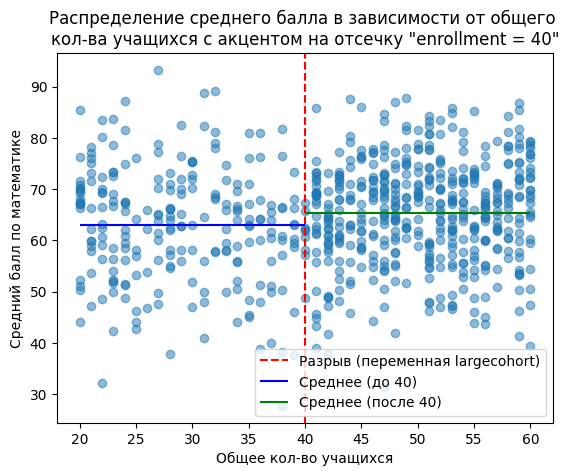

In [ ]:
plt.scatter(df['enrollment'], df['avgmath'], alpha=0.5)
plt.axvline(40, color='red', linestyle='--', label='Разрыв (переменная largecohort)')

mean_left = df[df['enrollment'] < 40]['avgmath'].mean()
mean_right = df[df['enrollment'] >= 40]['avgmath'].mean()
plt.hlines(mean_left, xmin=df['enrollment'].min(), xmax=40, colors='blue', label='Среднее (до 40)')
plt.hlines(mean_right, xmin=40, xmax=df['enrollment'].max(), colors='green', label='Среднее (после 40)')

plt.title('Распределение среднего балла в зависимости от общего \nкол-ва учащихся с акцентом на отсечку "enrollment = 40"')
plt.xlabel('Общее кол-во учащихся')
plt.ylabel('Средний балл по математике')
plt.legend()
plt.show()

Переменная `large_cohort` оказалась значимой в модели RDD, на графике видим что средний балл до 40 учеников ниже чем после 40 учеников - что идет в пользу теории что разделение класса положительно влияет на успеваемость

### d)

In [ ]:
model_3 = sm.OLS(df['avgmath'], df[['const', 'large_cohort']]).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.254
Date:                Sun, 16 Mar 2025   Prob (F-statistic):            0.00419
Time:                        10:15:33   Log-Likelihood:                -2624.8
No. Observations:                 699   AIC:                             5254.
Df Residuals:                     697   BIC:                             5263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           62.9898      0.694     90.824   

Переменная `large_cohort` по прежнему значима на уровне 5%

### e)

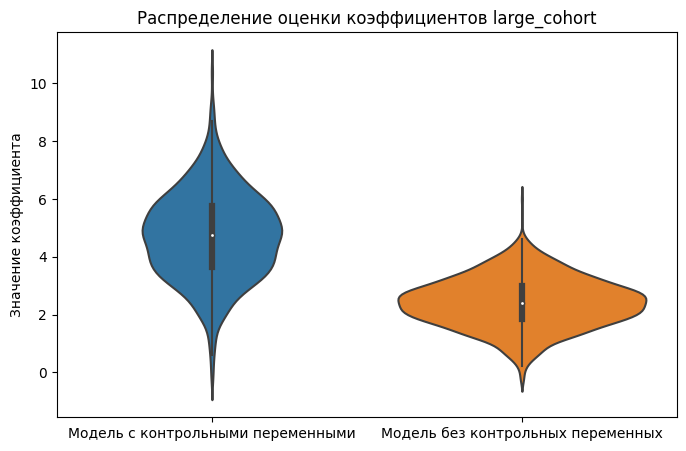

In [ ]:
coefficients = [4.7644, 2.4145]
std_errors = [1.497, 0.840]
labels = ['Модель с контрольными переменными', 'Модель без контрольных переменных']

data = [np.random.normal(coef, std, 1000) for coef, std in zip(coefficients, std_errors)]

plt.figure(figsize=(8, 5))
sns.violinplot(data=data)
plt.xticks(ticks=[0, 1], labels=labels)
plt.ylabel("Значение коэффициента")
plt.title("Распределение оценки коэффициентов large_cohort")
plt.show()

Модель без контрольных переменных дает более точную но низкую оценку для дамми-переменной `large_cohort`

### f)

In [ ]:
df['enrollment_squared'] = df['enrollment'] ** 2

model_4 = sm.OLS(df['avgmath'], df[['const', 'large_cohort', 'classize', 'disadv', 'enrollment', 'enrollment_squared']]).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                avgmath   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     67.95
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           8.62e-58
Time:                        10:21:19   Log-Likelihood:                -2489.5
No. Observations:                 699   AIC:                             4991.
Df Residuals:                     693   BIC:                             5018.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 80.7790      4

Переменная `large_cohort` по прежнему значима на уровне 5%

### g)

In [ ]:
model_5 = sm.OLS(df['disadv'], df[['const', 'large_cohort', 'classize', 'enrollment']]).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 disadv   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     7.928
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           3.33e-05
Time:                        10:51:11   Log-Likelihood:                -2956.4
No. Observations:                 699   AIC:                             5921.
Df Residuals:                     695   BIC:                             5939.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.7362      3.851      9.799   

Сам факт, что `enrollment` перешел порог в 40 единиц, не должен внезапно менять процент малообеспеченных учеников `disadv` - поэтому переменная `large_cohort` не должна прокрашиваться что и подтверждается плацебо-тестом (pvalue = 0.879)

### h)

Если не все школы строго следовали правилу формирования классов то это приводит к несовершенному соблюдению порога. В таких случаях стандартный разрывный дизайн может давать смещенные оценки. В такой ситуации наиболее подходящим методом является Fuzzy RDD (нечеткий разрывный дизайн)

Для дизайна Fuzzy RDD используется 2МНК:
1. Моделируем влияние `large_cohort` на фактическое зачисление в большой класс   
    $$classize_i = \pi_0 + \pi_1 large\_cohort_i + \pi_2 disadv_i + \pi_3 enrollment_i + \epsilon_i$$
2. Оцениваем регрессию на таргет используя предсказанные значения для размера класса из 1 шага
    $$avgmath_i = \beta_0 + \beta_1 \hat{classize}_i + \beta_2 disadv_i + \beta_3 enrollment_i + \nu_i$$